In [1]:
import matplotlib.pyplot as plt
from gensim import models
from sklearn.manifold import TSNE

EMBEDDINGS_PATH = "../embeddings/with_pretrained_per_review_w15"

In [2]:
model = models.Word2Vec.load(EMBEDDINGS_PATH)

In [3]:
def neighbours(word, n=10):
    return [w for w, score in model.wv.most_similar(word, topn=n)]

In [4]:
def reduce_dimensions(words, vectors):
    tsne = TSNE(n_components = 2)
    reduced = tsne.fit_transform(vectors)
    x_values = [row[0] for row in reduced]
    y_values = [row[1] for row in reduced]
    return x_values, y_values


In [5]:
target ='translation'
nwords = 15
words = [target] + neighbours(target, nwords)
w2i = {word: index for index, word in enumerate(words)}
vectors = [model.wv[word] for word in words]
x_values, y_values = reduce_dimensions(words, vectors)


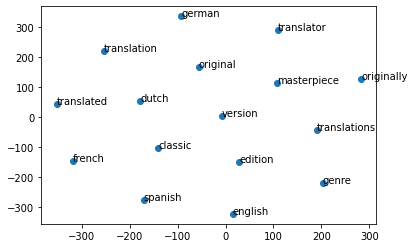

In [6]:
for i, word in enumerate(words):
   plt.annotate(word, (x_values[i], y_values[i]))

plt.scatter(x_values, y_values)

In [50]:
def most_similar(positive, negative, n=10):
    return [w for w, score in model.wv.most_similar(positive=positive, negative=negative, topn=n)]

pos_words = most_similar(['good', 'great'], ['bad'])
neg_words = most_similar(['boring', 'stilted'], ['good'])

print('POSITIVE:', ', '.join(pos_words))
print()
print('NEGATIVE:', ', '.join(neg_words))

POSITIVE: wonderful, fantastic, fun, brilliant, perfect, fascinating, amazing, nice, lovely, full

NEGATIVE: repetitive, dull, predictable, poorly, unusual, strangely, sparse, abrupt, intriguing, anticlimactic
